In [50]:
%pip install --dry-run ipympl
# https://matplotlib.org/ipympl/installing.html

Note: you may need to restart the kernel to use updated packages.


In [48]:
%matplotlib widget


ModuleNotFoundError: No module named 'ipympl'

In [39]:
%matplotlib inline


# PCA example with Iris Data-set

Principal Component Analysis applied to the Iris dataset.

See [here](https://en.wikipedia.org/wiki/Iris_flower_data_set) for more
information on this dataset.


In [46]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

# unused but required import for doing 3d projections with matplotlib < 3.2
#import mpl_toolkits.mplot3d  # noqa: F401

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
X

In [ ]:
X

In [ ]:
y

In [ ]:

pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)


In [27]:

pca.get_covariance()

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [28]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [30]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 3,
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [31]:
pca.singular_values_

array([25.09996044,  6.01314738,  3.41368064])

In [36]:
# Reorder the labels to have colors matching the cluster results
#???
#np.choose(
y.astype(np.int64)
###y.astype(int)
 #   , [1, 2, 0])
#np.choose(y, [1, 2, 0])
    #.astype(float)
    
    
#y = np.choose(y, [1, 2, 0]).astype(float)
y = np.choose(y.astype(np.int64)   , [1, 2, 0]).astype(float)

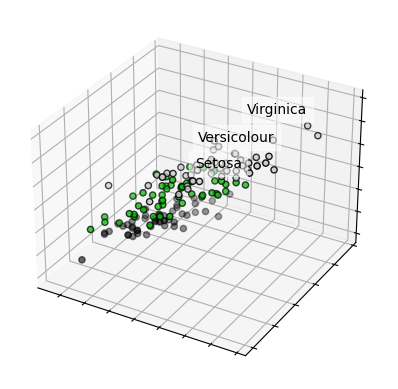

In [47]:
fig = plt.figure()
#fig = plt.figure(1, figsize=(4, 3))
#plt.clf()

ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
#ax.set_position([0, 0, 0.95, 1])


#plt.cla()









for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )

    
Axes3D.scatter(xs, ys, zs=0, zdir='z', s=20, c='b', *args, **kwargs)¶
    
    
    

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])


plt.show()

In [45]:
plt.plot3()

AttributeError: module 'matplotlib.pyplot' has no attribute 'plot3'